In [154]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py'>

In [155]:
out_dir = './'

In [156]:
all_df = pd.DataFrame()

In [157]:
simulation = False

In [158]:
experiments = {'d75786f7-data-2018-01-25-big-experiment':'Large-Population-High-Evidence',
                'abf00068-rounds-10-evidence-4-population-5':'Small-Population-High-Evidence',
                'b7d0390f-rounds-10-evidence-4-population-5':'Small-Population-High-Evidence',
               '70f80fdf-rounds-10-evidence-1-population-5':'Small-Population-Low-Evidence',
               'd9145d2a-rounds-10-evidence-1-population-5':'Small-Population-Low-Evidence',
              }
n_evidences = {'d75786f7-data-2018-01-25-big-experiment':4,
               'abf00068-rounds-10-evidence-4-population-5':4,
               'b7d0390f-rounds-10-evidence-4-population-5':4,
               '70f80fdf-rounds-10-evidence-1-population-5':1,
               'd9145d2a-rounds-10-evidence-1-population-5':1,
              }

In [159]:

for in_dir in experiments:
    
    n_evidence = n_evidences[in_dir]

    exp_name = experiments[in_dir]

    raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

    raw_data = raw_data[raw_data['time_of_death'].isnull()]

    data,fails,parts = utils.parse_data(raw_data)
    
    fails = utils.get_evidence_subset(fails, n_evidence)
    
    if not simulation:
        data = data[data['net'] > 3]
        
    df = utils.get_parsed_data(data, fails, parts)
    
    df['Experiment'] = exp_name   
    df['exp_id'] = in_dir
    
    all_df = pd.concat([all_df, df])

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  x = net_evidence[i]


In [160]:
all_df.index = range(len(all_df))
df = all_df

Large-Population-High-Evidence
correlation with net evidence 0.555871757842
correlation with last evidence 0.526811919853
Small-Population-High-Evidence
correlation with net evidence 0.382990821108
correlation with last evidence 0.439241429527
Small-Population-Low-Evidence
correlation with net evidence 0.0556333944518
correlation with last evidence 0.457305240571


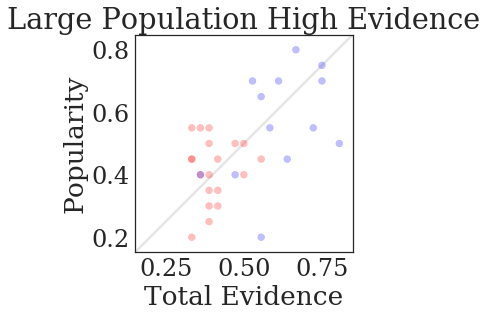

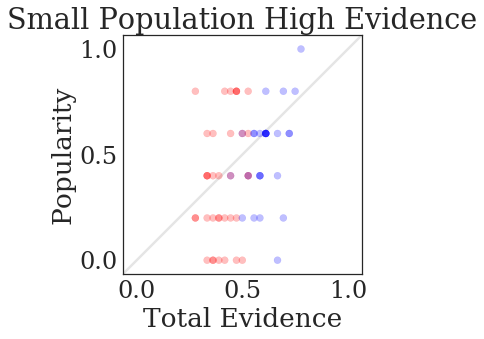

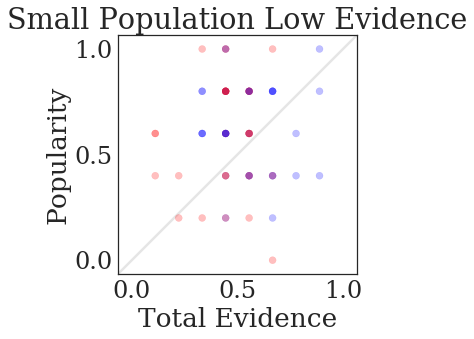

In [161]:
for exp_name in set(df['Experiment']):
    
    sub = df[df['Experiment'] == exp_name]
    
    colors = np.array(['']*len(sub['probs']))
    colors[np.array(sub['probs']) > 0.5] = 'blue'
    colors[np.array(sub['probs']) <= 0.5] = 'red'
    
    fig, ax = plt.subplots()
    
    sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
    plt.scatter(sub['net_evidences'],sub['final_pops'],s=50,alpha=0.25,c=colors)
    plt.xlabel('Total Evidence')
    plt.ylabel('Popularity')
    plt.title(exp_name.replace('-',' '))
    
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    plt.savefig(out_dir + exp_name + 'pop-evidence.jpg', bbox_inches = 'tight')
    
    print(exp_name)
    print('correlation with net evidence', np.corrcoef(sub['net_evidences'],sub['final_pops'])[0,1])
    print('correlation with last evidence', np.corrcoef(sub['evidences'],sub['final_pops'])[0,1])